# Yeo-Johnson transformation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer

In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
# drop lat and lon
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


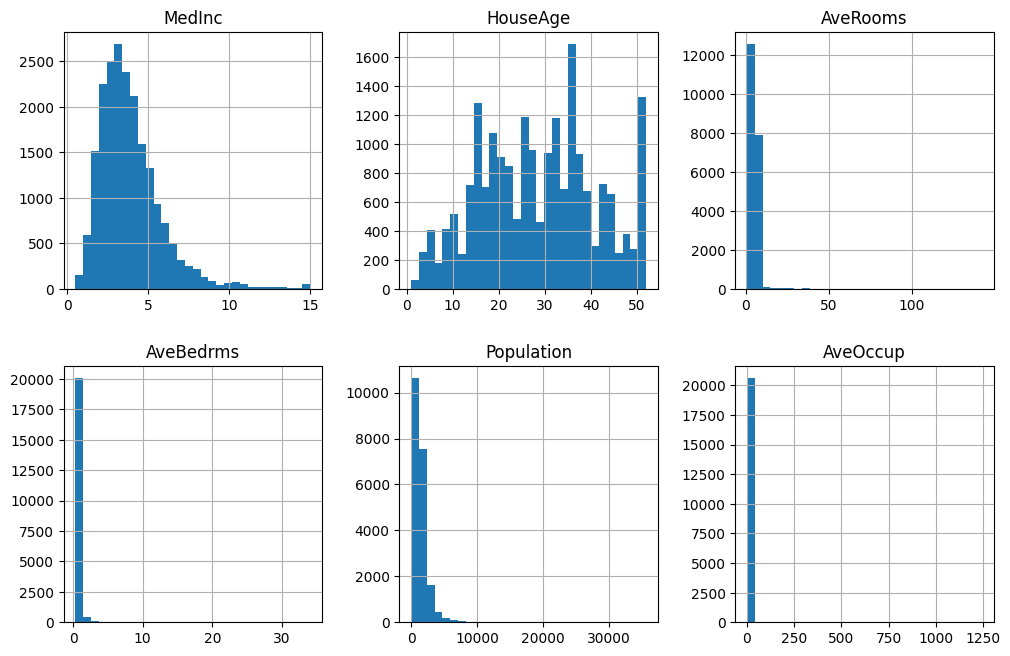

In [3]:
X.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

In [4]:
variables = list(X.columns)
variables

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [5]:
def make_qqplot(df):

    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i in range(6):

        ax = plt.subplot(2, 3, i + 1)
        var = variables[i]
        stats.probplot((df[var]), dist="norm", plot=plt)
        ax.set_title(var)

    plt.show()

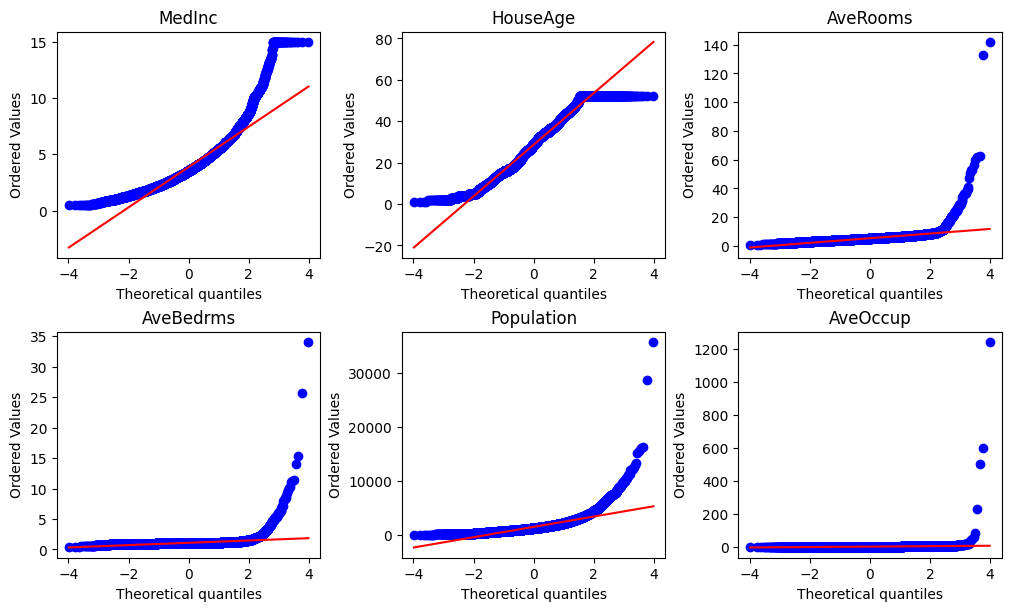

In [6]:
make_qqplot(X)

# [Yeo-Johnson transformation with Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

In [7]:
transformer = PowerTransformer(method="yeo-johnson", standardize=False)

In [8]:
transformer.fit(X)

PowerTransformer(standardize=False)

In [9]:
transformer.lambdas_

array([-0.19850992,  0.80814809, -0.5536698 , -4.39408222,  0.23352364,
       -0.90134561])

In [10]:
X_tf = transformer.transform(X)
X_tf

array([[ 1.8035986 , 24.13344395,  1.23437156,  0.21730344, 12.22322374,
         0.7558211 ],
       [ 1.80195764, 13.80736684,  1.20246042,  0.21606014, 22.08794362,
         0.71044476],
       [ 1.72457851, 29.38077791,  1.28031155,  0.21834124, 13.97068781,
         0.77657018],
       ...,
       [ 0.9014624 , 11.55509421,  1.14875904,  0.21920155, 17.2479839 ,
         0.7338578 ],
       [ 0.95050152, 12.12644493,  1.15591917,  0.22004504, 15.76140519,
         0.71198436],
       [ 1.08383359, 10.97761774,  1.15162557,  0.21989608, 18.91795897,
         0.76123875]])

In [11]:
X_tf = pd.DataFrame(X_tf, columns=variables)

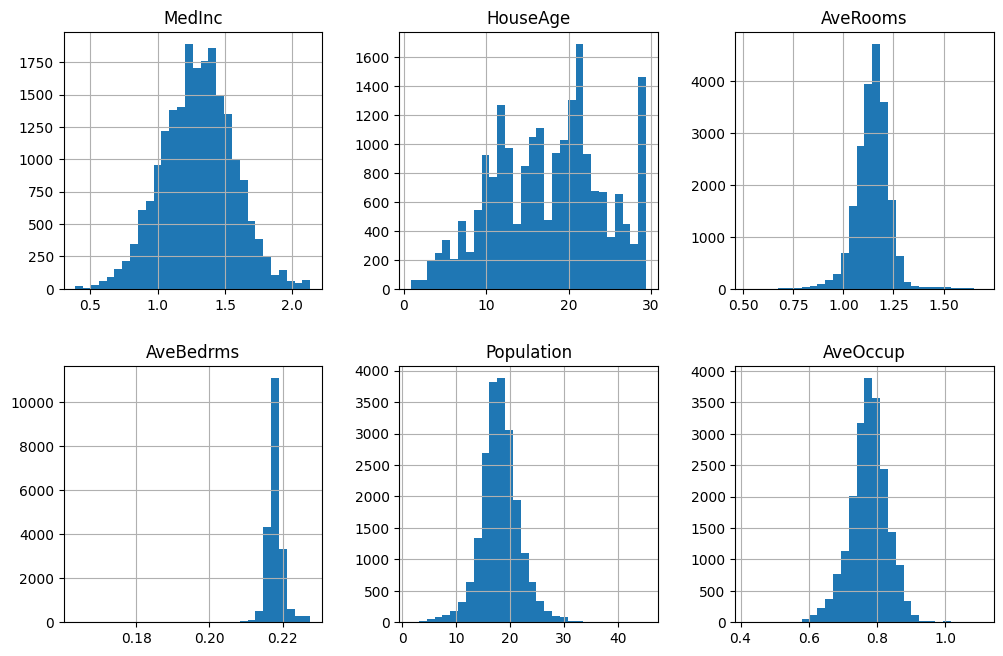

In [12]:
X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

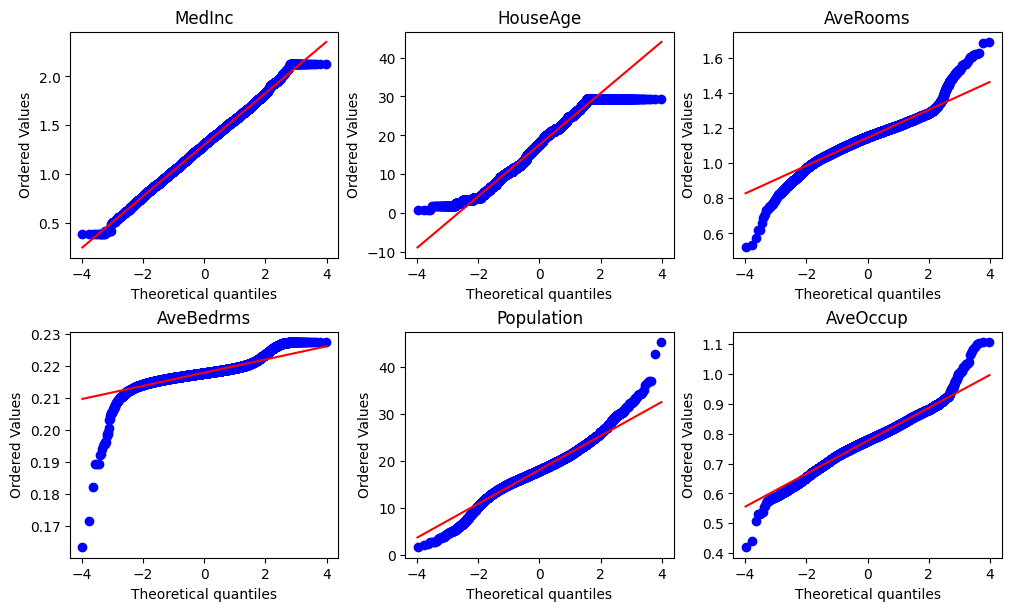

In [13]:
make_qqplot(X_tf)

# Yeo-Johnson transformation with Feature-engine

In [14]:
yjt = YeoJohnsonTransformer()
yjt.fit(X)

YeoJohnsonTransformer()

In [15]:
yjt.lambda_dict_

{'MedInc': -0.19850991676559598,
 'HouseAge': 0.8081480895997063,
 'AveRooms': -0.5536698033957893,
 'AveBedrms': -4.3940822236920365,
 'Population': 0.23352363517075606,
 'AveOccup': -0.9013456138434744}

In [16]:
X_tf = yjt.transform(X)

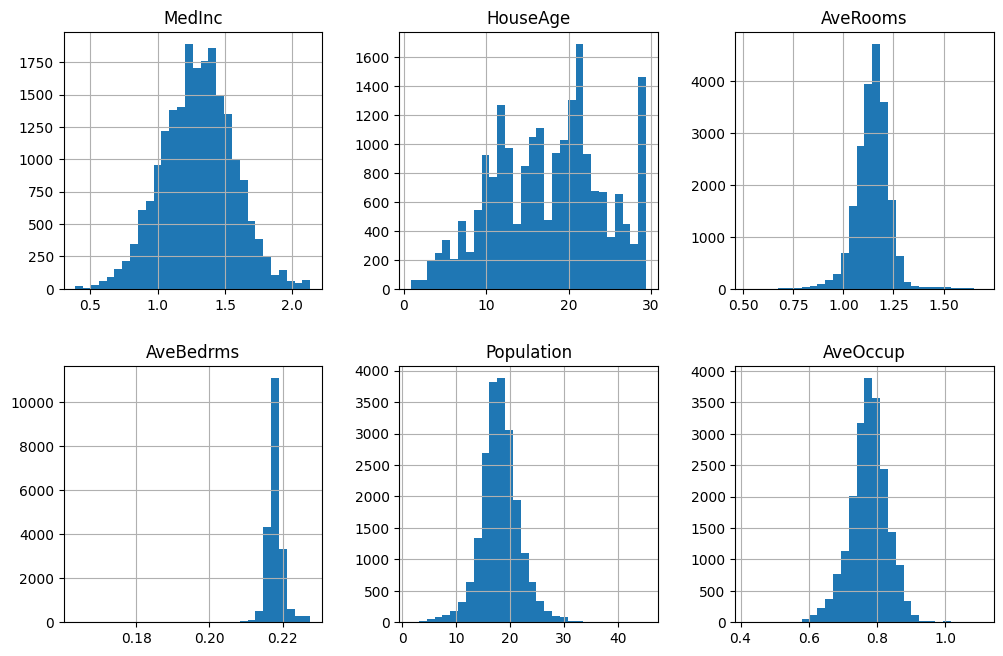

In [17]:
X_tf.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

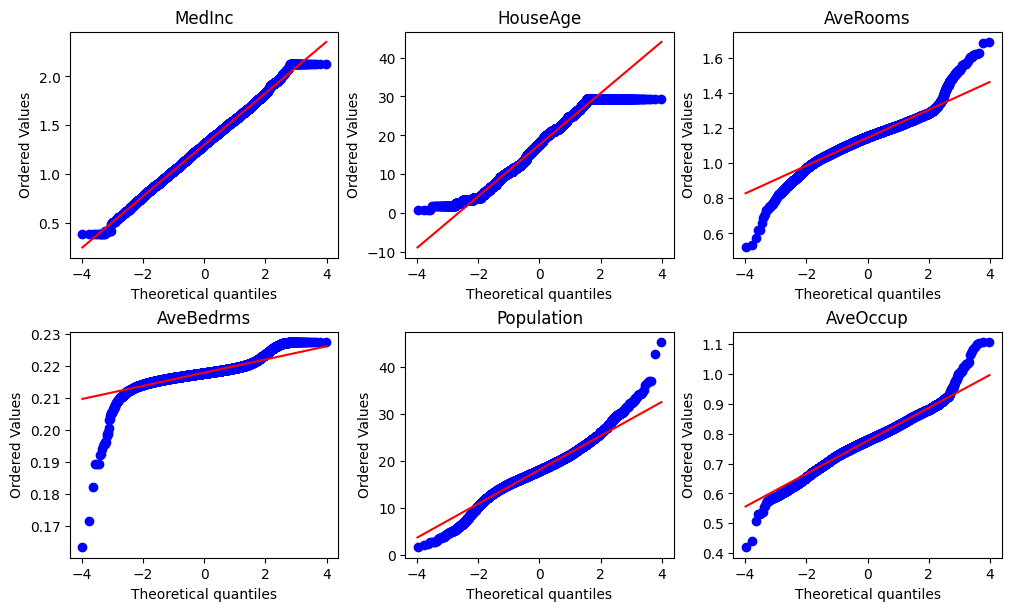

In [18]:
make_qqplot(X_tf)

# Yeo-Johnson transformation with SciPy

One variable at a time.

In [19]:
X_tf = X.copy()

Optimal λ:  -0.19850991676559598


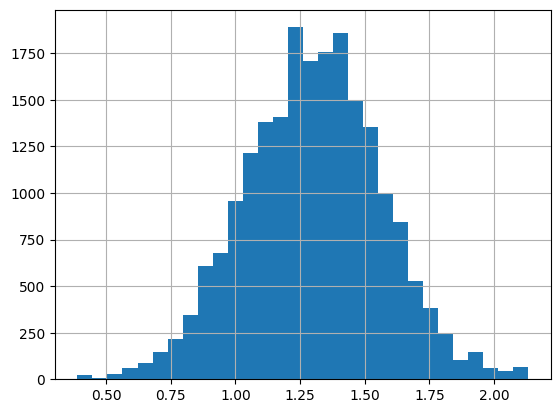

In [20]:
# apply the Box-Cox transformation to variable MedInc
X_tf["MedInc"], param = stats.yeojohnson(X["MedInc"])

# print the optimal lambda found for MedInc
print("Optimal λ: ", param)

# visualize the transformed variable
X_tf["MedInc"].hist(bins=30)
plt.show()